In [1]:
# Importing required libraries to build the models:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Reading and Understanding the Data:

In [2]:
# Importing the data using pandas to understand the headers:
bike_df=pd.read_csv('day.csv')

In [3]:
# Exploring the data frame
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check for null Values and Datatypes:
def nullfunc(x):
    print(x.isnull().sum(),x.info())
nullfunc(bike_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

In [5]:
# Removing Unecessary columns as 1.instant 2.dte day (already exists as mnth yr and working/weekdays) 3.casual 4. Regeistred
bike_df=bike_df.drop(['instant','casual','registered','dteday'],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# Check for min max and average of several columns:
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
# Copying data frame for further modifications:
newbike_df=bike_df.copy()

In [8]:
newbike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
newbike_df.shape

(730, 12)

In [10]:
# Changing numeriacal variables to appropriate format:
newbike_df[['temp','atemp','hum','windspeed','cnt']]=newbike_df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [11]:
# Dropping duplicataes if any:
newbike_df.drop_duplicates(inplace=True)

In [12]:
# Verifying no duplicates were found:
newbike_df.shape

(730, 12)

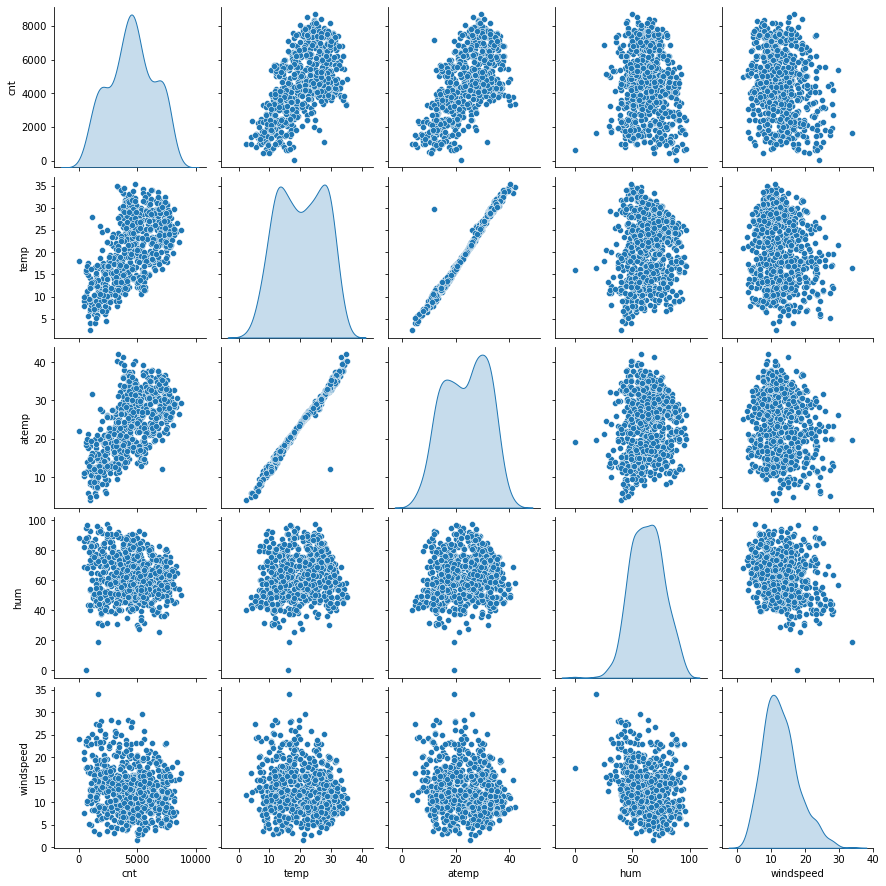

In [13]:
# Visualizing numerical variables to see there correlation and significance with cnt column:
sns.pairplot(newbike_df,vars=['cnt','temp','atemp','hum','windspeed'],diag_kind="kde")
plt.show()

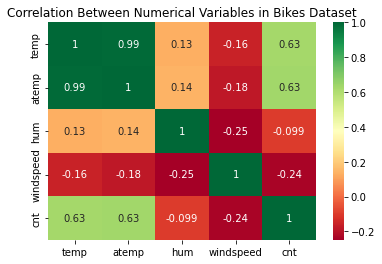

In [14]:
# Checking correlation between numerical variables:
sns.heatmap(newbike_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='RdYlGn')
plt.title("Correlation Between Numerical Variables in Bikes Dataset")
plt.show()

### Temp and Atemp seem to have 0.99 correlation (MULTICOLINEARITY) we can remove atemp to reduce noise and improve the model since temp is more normally distributed: 

In [15]:
newbike_df.drop('atemp',inplace=True,axis=1)

In [16]:
newbike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

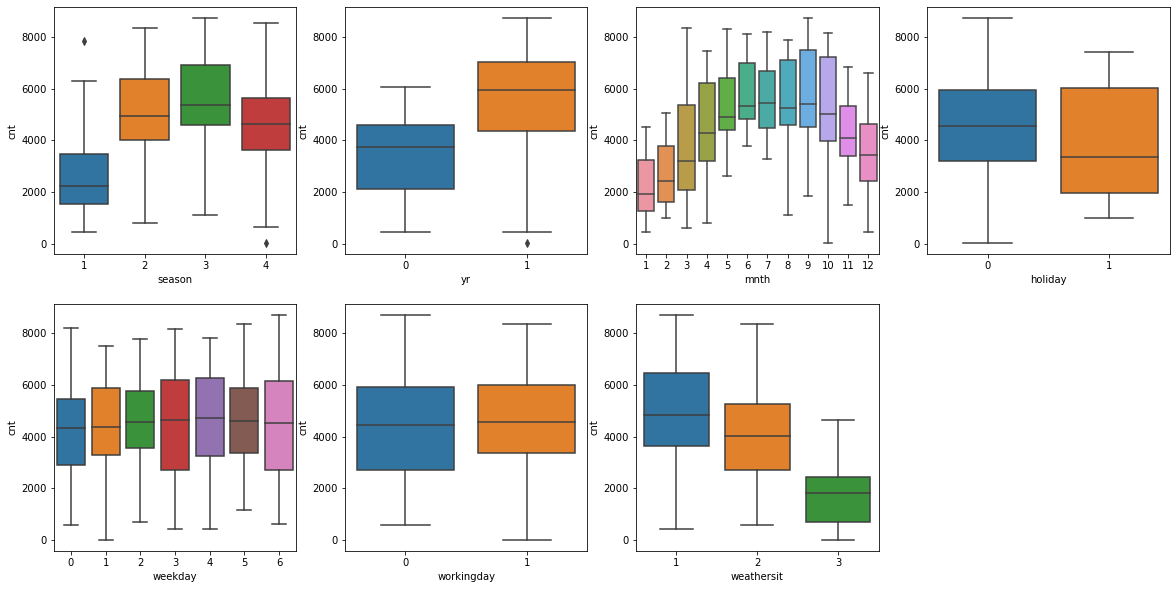

In [17]:
# Visualizing Categorical Variables:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x="season", y="cnt", data=bike_df)
plt.subplot(2,4,2)
sns.boxplot(x="yr", y="cnt", data=bike_df)
plt.subplot(2,4,3)
sns.boxplot(x="mnth", y="cnt", data=bike_df)
plt.subplot(2,4,4)
sns.boxplot(x="holiday", y="cnt", data=bike_df)
plt.subplot(2,4,5)
sns.boxplot(x="weekday", y="cnt", data=bike_df)
plt.subplot(2,4,6)
sns.boxplot(x="workingday", y="cnt", data=bike_df)
plt.subplot(2,4,7)
sns.boxplot(x="weathersit", y="cnt", data=bike_df)
plt.show()

### Cetegorical variables are represented in numbers thus we shall change the datatype and encode them properly to be able to build the model:


In [18]:
# Changing datatype for yr and worinkday columns: ccc
newbike_df.yr=newbike_df.yr.astype('category')
newbike_df.workingday=newbike_df.workingday.astype('category')
newbike_df.holiday=newbike_df.holiday.astype('category')
newbike_df.mnth=newbike_df.mnth.astype('category')
newbike_df.weekday=newbike_df.weekday.astype('category')
newbike_df.weathersit=newbike_df.weathersit.astype('category')
newbike_df.season=newbike_df.season.astype('category')

In [19]:
newbike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 51.1 KB


In [20]:
# Changing number to categories they represent from dictionary to be able to encode the columns later:
newbike_df['season']=newbike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
newbike_df.mnth=newbike_df.mnth.map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
newbike_df.weekday=newbike_df.weekday.map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})
newbike_df.weathersit=newbike_df.weathersit.map({1:'Clear',2:'Mist_Clouds',3:'Light_Snow_Rain',4:'Heavy_Rain'})
#newbike_df.yr=newbike_df.yr.map({0:'2018',1:'2019'})
#newbike_df.workingday=newbike_df.workingday.map({0:'Weekend_or_Holiday',1:'Workingday'})

In [21]:
# Checking columns again:
newbike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [22]:
newbike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 51.1 KB


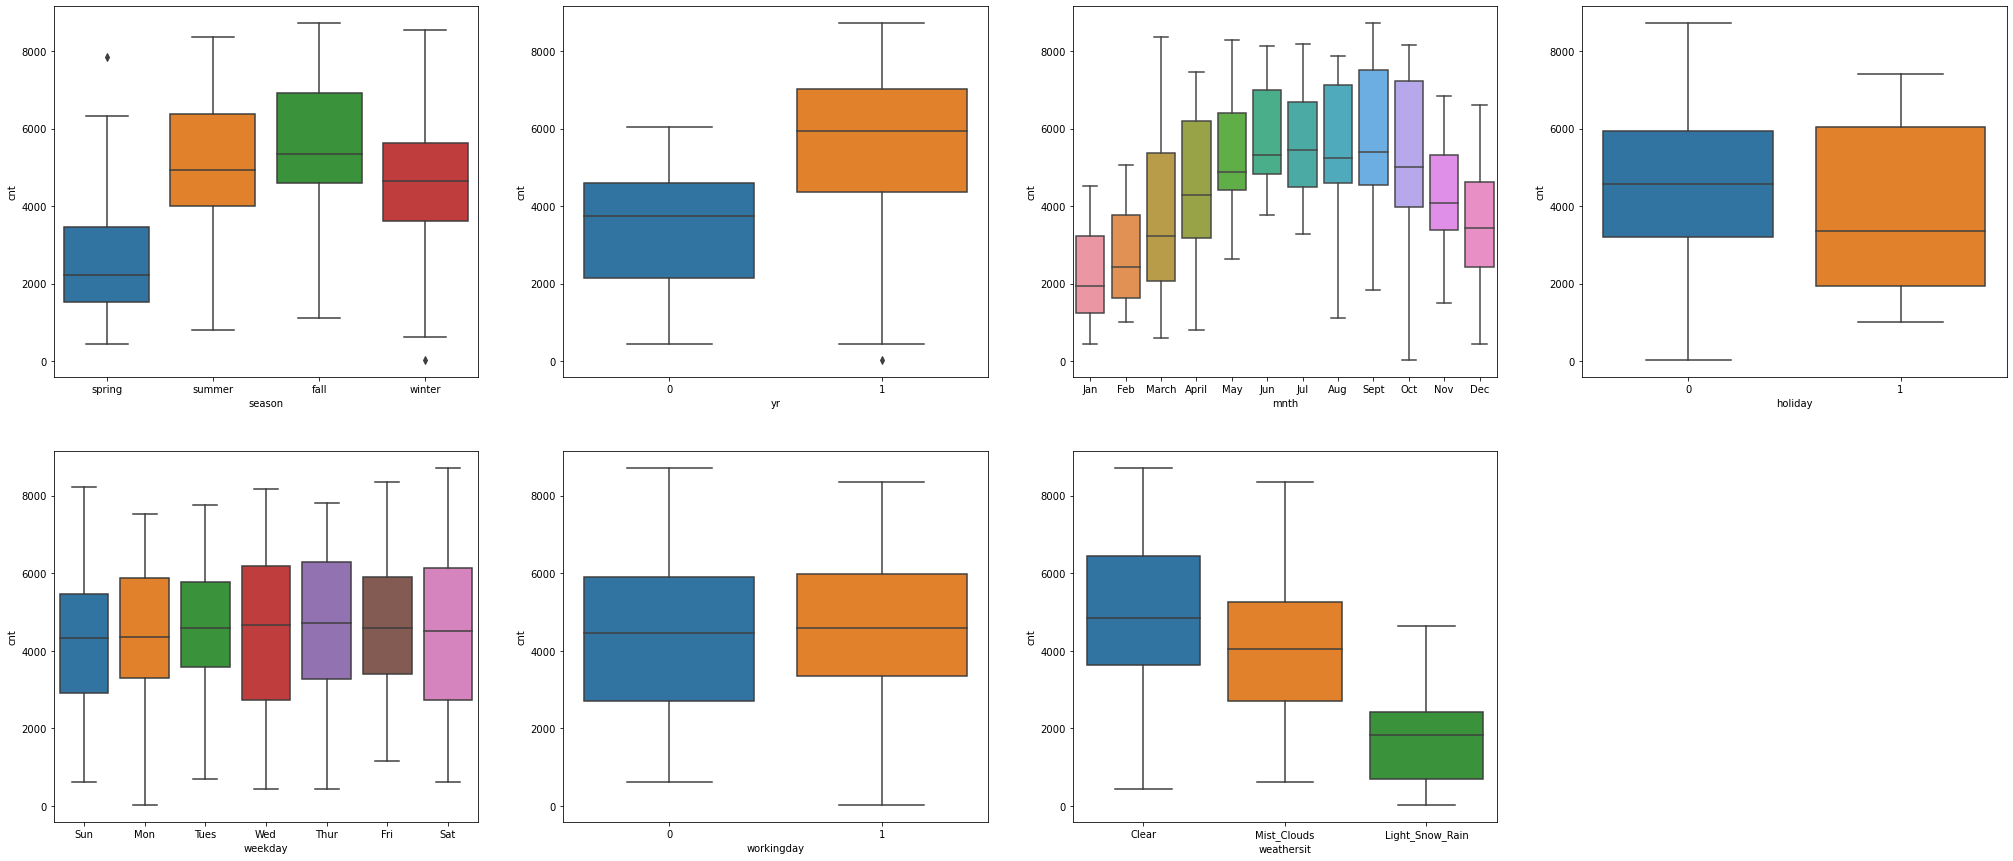

In [23]:
# Visualizing Categorical Variables Again after adding descreption:
plt.figure(figsize=(35,15))
plt.subplot(2,4,1)
sns.boxplot(x="season", y="cnt", data=newbike_df)
plt.subplot(2,4,2)
sns.boxplot(x="yr", y="cnt", data=newbike_df)
plt.subplot(2,4,3)
sns.boxplot(x="mnth", y="cnt", data=newbike_df)
plt.subplot(2,4,4)
sns.boxplot(x="holiday", y="cnt", data=newbike_df)
plt.subplot(2,4,5)
sns.boxplot(x="weekday", y="cnt", data=newbike_df)
plt.subplot(2,4,6)
sns.boxplot(x="workingday", y="cnt", data=newbike_df)
plt.subplot(2,4,7)
sns.boxplot(x="weathersit", y="cnt", data=newbike_df)
plt.show()

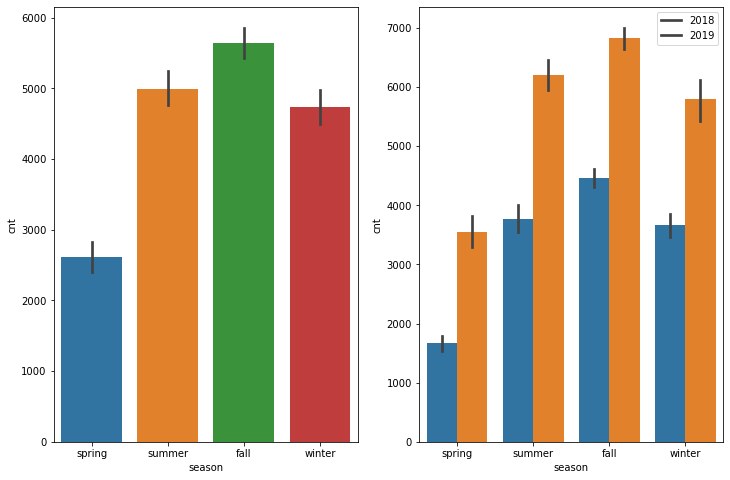

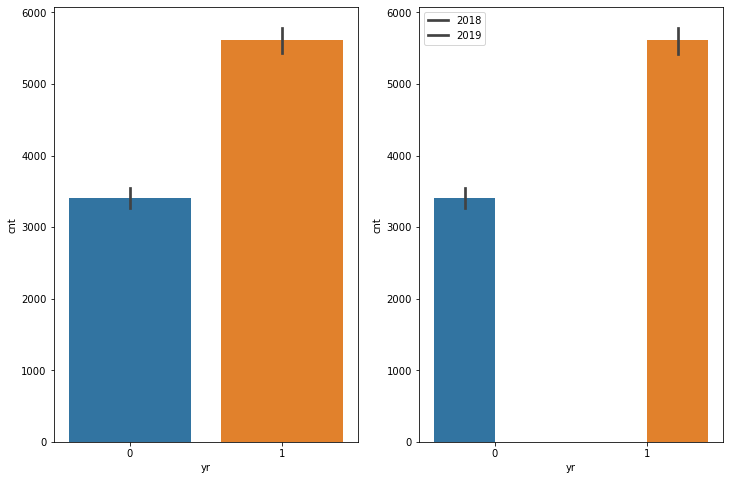

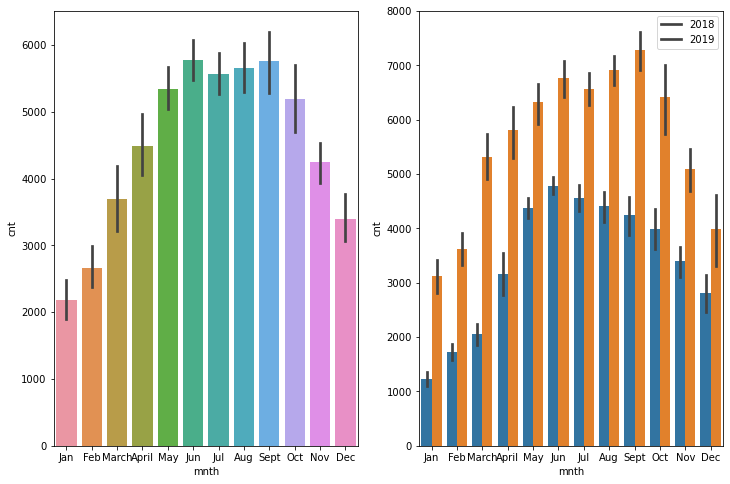

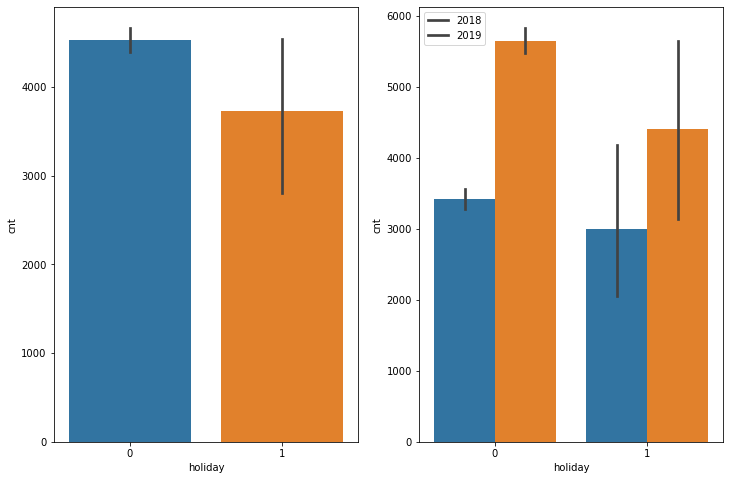

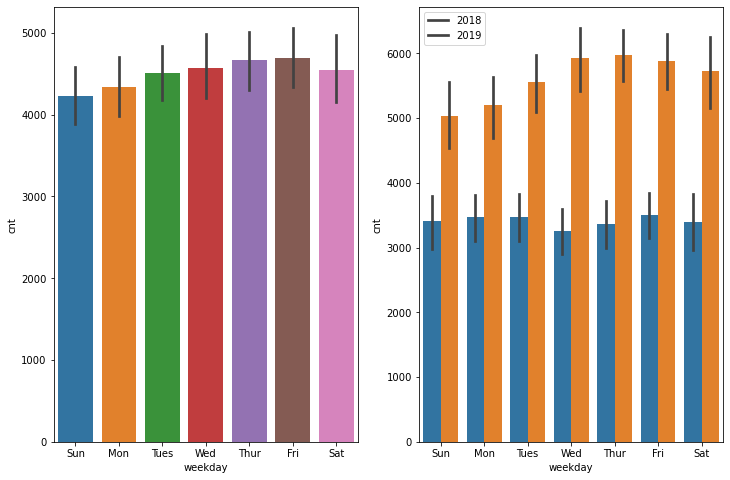

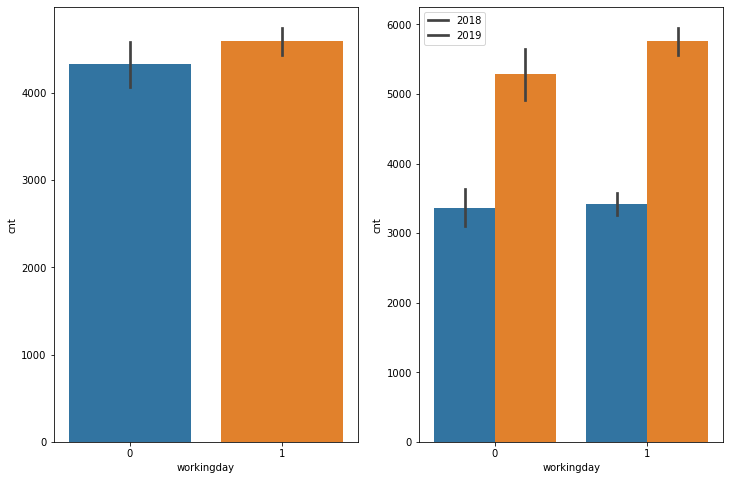

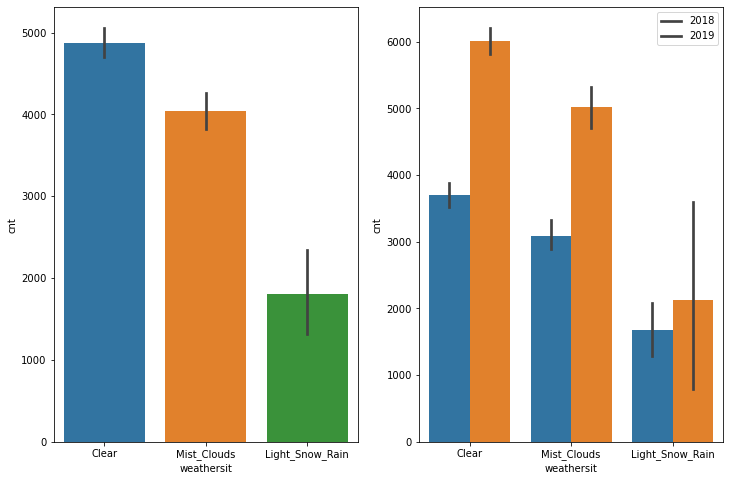

In [24]:
# Plotting Categorical Variables to understand there relation with cnt in both years 2018 2019 Bivariate analysis:
def plot_categorical_cols(c):
        plt.figure(figsize=(12,8))
        plt.subplot(1,2,1)
        sns.barplot(c,'cnt',data=newbike_df)
        plt.subplot(1,2,2)
        sns.barplot(c,'cnt',data=newbike_df,hue='yr')
        plt.legend(labels=['2018','2019'])
        plt.show()
var=['season','yr','mnth','holiday','weekday','workingday','weathersit']
for j in var:
    plot_categorical_cols(j)
   

#### We can infer from above barplots that under all weather conditions, weekdays, holidays,working days the count of people booking bikes is increasing in 2019 which shows a direct proptional relation as a reason behind becoming more popular thus more users:
- Season: Most of the bike bookings were done in fall season:
- Year: Almost twice number of bookings were made on 2019 rather than 2018:
- Month: Most of the bike booking were made in months range May- Oct 
- Holiday: More bookings were made on were made on non-holiday days for both years:
- Weekday: Most Bookings were made on Saturday,Thursday, Friday;
- Working day: Wether its a working day or not the count of bookings appear to be similar:
- Weather sit: Most of the bookings were made in clear weather followed by mist-clouds,lights-snow respectively:

## Step 2 Data prepration: 
- Encoding:
    - Converting binary vars to 1 & 0 
    - Other Categorical vars to dummy vars
- Splitting into Train and test data
- Rescaling of variables:
## Encoding Categorical Variables:

In [25]:
# Dummy Encoding for columns 'Season','mnth','weekday','','weathersit': Columns created n-1:
season_newbike_df=pd.get_dummies(newbike_df.season,drop_first=True)
mnth_newbike_df=pd.get_dummies(newbike_df.mnth,drop_first=True)
weekday_newbike_df=pd.get_dummies(newbike_df.weekday,drop_first=True)
weathersit_newbike_df=pd.get_dummies(newbike_df.weathersit,drop_first=True)

In [26]:
newbike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [27]:
# Merging dummy dataset to our dataset:
merbike_df=pd.concat([newbike_df,season_newbike_df,mnth_newbike_df,weekday_newbike_df,weathersit_newbike_df],axis=1)

In [28]:
merbike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist_Clouds,Light_Snow_Rain
0,spring,0,Jan,0,Sat,0,Mist_Clouds,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,1,1,0
1,spring,0,Jan,0,Sun,0,Mist_Clouds,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Checking dummy encoding applied to wathersit column:
weathersit_newbike_df.head()

,Mist_Clouds,Light_Snow_Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
# Checking columns and data types in merged dataset:
merbike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   yr               730 non-null    category
 2   mnth             730 non-null    category
 3   holiday          730 non-null    category
 4   weekday          730 non-null    category
 5   workingday       730 non-null    category
 6   weathersit       730 non-null    category
 7   temp             730 non-null    float64 
 8   hum              730 non-null    float64 
 9   windspeed        730 non-null    float64 
 10  cnt              730 non-null    int64   
 11  summer           730 non-null    uint8   
 12  fall             730 non-null    uint8   
 13  winter           730 non-null    uint8   
 14  Feb              730 non-null    uint8   
 15  March            730 non-null    uint8   
 16  April            730 non-null    uint8   
 1

In [31]:
# Dropping columns used to create dummies for 'Season','mnth','weekday','weathersit'
merbike_df.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)
merbike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist_Clouds,Light_Snow_Rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Step 2 Data prepration: 
### Splitting into Train and test data

In [32]:
# Splitting the data set to train and test:
merdf_train, merdf_test= train_test_split(merbike_df,train_size=0.7,random_state=100)
print(merdf_train.shape)
print(merdf_test.shape)

(510, 29)
(220, 29)


## Step 2 Data prepration: 
### Rescaling Numerical Variables:

In [33]:
# we will use min-max to rescale the ['cnt','temp','hum','windspeed'] columns:
# step 1 create an object:
scaler=MinMaxScaler()
# step 2 create a list of numerical variables that you want to rescale:
num_vars=['cnt','temp','hum','windspeed']

#step 3 fit on data
merdf_train[num_vars]=scaler.fit_transform(merdf_train[num_vars])
merdf_train[num_vars].head()

# transform on test data:
merdf_test[num_vars]=scaler.transform(merdf_test[num_vars])

In [34]:
# After rescaling checking min and mix for numerical columns:
merdf_train[num_vars].describe()

,cnt,temp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.537440,0.650480,0.320883
std,0.224421,0.225858,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.339853,0.538643,0.199179
50%,0.518638,0.542596,0.653714,0.296763
75%,0.684710,0.735215,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


- The maximum is one thus rescaling is succesful:

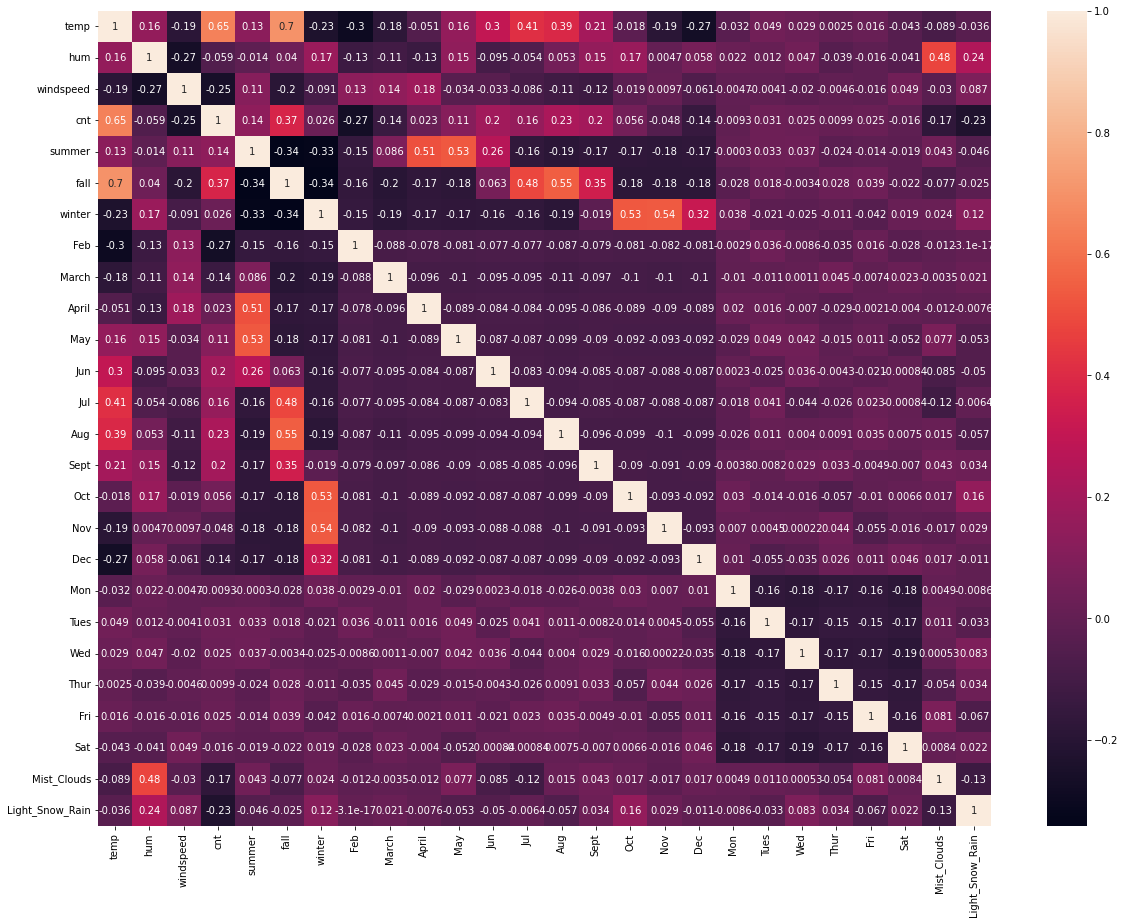

In [35]:
#Draw a heatmap:
plt.figure(figsize=(20,15))
matrix=np.triu(merdf_train.corr())
sns.heatmap(merdf_train.corr(),annot=True)
plt.show()

### Variable with highest correlation with count is temp (+0.65) lets check its properties and relation:

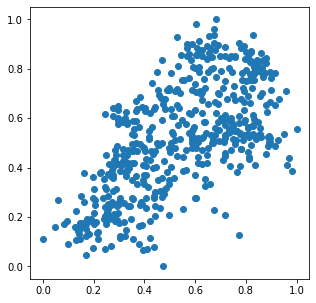

In [36]:
# plotting scatter plot with cnt and temp:
plt.figure(figsize=[5,5])
plt.scatter(merdf_train.temp, merdf_train.cnt)
plt.show()

- Shows homosedastic and liner relation we can infer this variable has a strong linear relation on cnt

In [37]:
# Defining X and y variables:aaa
y_train=merdf_train.pop('cnt')
X_train=merdf_train

In [38]:
X_train.shape

(510, 28)

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Feb,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist_Clouds,Light_Snow_Rain
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### RFE The model has 28 variables thus we will use RFE to build the model then add or remove variables for accuracy.
Recursive feature elimination

In [41]:
# Running RFE with the output number of the variable equal to 16
# Creating an object and fitting the model:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
# Running RFE with the output number of the variable equal to 16
rfe = RFE(lm, n_features_to_select=16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
# Viewing all columns relative to RFE support and rank:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 5),
 ('March', True, 1),
 ('April', False, 3),
 ('May', False, 2),
 ('Jun', False, 4),
 ('Jul', False, 6),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 7),
 ('Dec', False, 8),
 ('Mon', False, 9),
 ('Tues', False, 10),
 ('Wed', False, 12),
 ('Thur', False, 13),
 ('Fri', False, 11),
 ('Sat', True, 1),
 ('Mist_Clouds', True, 1),
 ('Light_Snow_Rain', True, 1)]

In [44]:
# Displaying X_train to include only supported columns:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'March', 'Aug', 'Sept', 'Oct', 'Sat', 'Mist_Clouds',
       'Light_Snow_Rain'],
      dtype='object')

In [45]:
# Updating X_train to remove unsupported features relative to priority and number given: (Unsupported Columns)
X_train.columns[~rfe.support_]

Index(['Feb', 'April', 'May', 'Jun', 'Jul', 'Nov', 'Dec', 'Mon', 'Tues', 'Wed',
       'Thur', 'Fri'],
      dtype='object')

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.46e-190
Time:                        19:34:38   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1892      0.029     

In [48]:
# Lets check VIF for this model
# Checking VIF
# Defining a function for VIF:
def VIF_check(X):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
VIF_check(X_train_rfe)

,Features,VIF
3,temp,24.20
4,hum,17.51
7,fall,8.53
2,workingday,5.09
5,windspeed,3.94
6,summer,3.54
8,winter,3.06
14,Mist_Clouds,2.15
0,yr,2.04
13,Sat,1.92


In [50]:
# Removing March for highest p-value :
X_train_rfe=X_train_rfe.drop(['March'],axis=1)

In [51]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm2 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.17e-191
Time:                        19:34:39   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1952      0.029     

In [52]:
VIF_check(X_train_rfe)

,Features,VIF
3,temp,24.07
4,hum,17.44
7,fall,8.19
2,workingday,5.05
5,windspeed,3.88
6,summer,3.46
8,winter,2.85
13,Mist_Clouds,2.15
0,yr,2.04
12,Sat,1.91


In [53]:
# Removing fall for highest p-value :
X_train_rfe=X_train_rfe.drop(['fall'],axis=1)

In [54]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm3 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.70e-192
Time:                        19:34:39   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1948      0.029     

In [55]:
VIF_check(X_train_rfe)

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,winter,2.25
12,Mist_Clouds,2.14
0,yr,2.03
11,Sat,1.90
6,summer,1.84
10,Oct,1.61


In [56]:
# Removing holiday for highest p-value :
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [57]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm4 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.92e-192
Time:                        19:34:40   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1850      0.028     

In [58]:
VIF_check(X_train_rfe)

,Features,VIF
3,hum,16.06
2,temp,10.01
1,workingday,4.56
4,windspeed,3.76
6,winter,2.25
11,Mist_Clouds,2.13
0,yr,2.03
5,summer,1.83
10,Sat,1.79
7,Aug,1.60


In [59]:
# Removing Oct for highest p-value :
X_train_rfe=X_train_rfe.drop(['Oct'],axis=1)

In [60]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm5 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.37e-192
Time:                        19:34:40   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1780      0.028     

In [61]:
VIF_check(X_train_rfe)

,Features,VIF
3,hum,16.03
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
10,Mist_Clouds,2.12
0,yr,2.02
5,summer,1.82
9,Sat,1.79
6,winter,1.75
7,Aug,1.59


### All p-values are below 0.05 let remove variables with highest VIF

In [62]:
# Removing hum for highest VIF value :
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [63]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm6 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.31e-189
Time:                        19:34:40   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0809      0.019     

In [64]:
VIF_check(X_train_rfe)

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.82
8,Sat,1.69
6,Aug,1.58
9,Mist_Clouds,1.54
5,winter,1.51
7,Sept,1.30


In [65]:
# Removing Aug for highest p-value :
X_train_rfe=X_train_rfe.drop(['Aug'],axis=1)

In [66]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm7 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.13e-188
Time:                        19:34:41   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

In [67]:
VIF_check(X_train_rfe)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,Sat,1.69
4,summer,1.57
8,Mist_Clouds,1.53
5,winter,1.40
6,Sept,1.20
9,Light_Snow_Rain,1.08


In [68]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Sat']=X_train['Sat']
X_train_rfe.head()

,yr,workingday,temp,windspeed,summer,winter,Sept,Sat,Mist_Clouds,Light_Snow_Rain
576,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,1,0
111,0,1,0.345824,0.380981,1,0,0,0,1,0


In [69]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm8 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.13e-188
Time:                        19:34:41   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

In [70]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,Sat,1.69
4,summer,1.57
8,Mist_Clouds,1.53
5,winter,1.40
6,Sept,1.20
9,Light_Snow_Rain,1.08


- Comparing Adjusted R squared the model did not improve:

In [71]:
# Removing Saturday after adding since it did not improve the model:
X_train_rfe.drop('Sat',inplace=True,axis=1)


In [72]:
#ADDING Feb AND CHECKING IF MODEL IMPROVES ddddd

X_train_rfe['Feb']=X_train['Feb']
X_train_rfe.head()

,yr,workingday,temp,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,Feb
576,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,0,0
111,0,1,0.345824,0.380981,1,0,0,1,0,0


In [73]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm9 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.29e-183
Time:                        19:34:41   Log-Likelihood:                 487.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     499   BIC:                            -907.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1087      0.019     

In [74]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
2,temp,4.36
3,windspeed,3.46
1,workingday,2.84
0,yr,2.02
4,summer,1.63
7,Mist_Clouds,1.51
5,winter,1.43
6,Sept,1.20
9,Feb,1.20
8,Light_Snow_Rain,1.08


 Feb has a high p-value and model R sqaured is lower:

In [75]:
# Removing Feb after adding since it did not improve the model:
X_train_rfe.drop('Feb',inplace=True,axis=1)

In [76]:
# Removing Temp and checking the model:
X_train_rfe.drop('temp',inplace=True,axis=1)

In [77]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm10 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     83.47
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           3.55e-87
Time:                        19:34:41   Log-Likelihood:                 254.90
No. Observations:                 510   AIC:                            -491.8
Df Residuals:                     501   BIC:                            -453.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4362      0.021     

In [78]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
2,windspeed,2.76
1,workingday,2.42
0,yr,1.84
6,Mist_Clouds,1.50
3,summer,1.49
4,winter,1.37
5,Sept,1.10
7,Light_Snow_Rain,1.08


## After Removing temp the R squared value dropped significantly:

In [79]:
# Removing workingday for high p-value:
X_train_rfe.drop('workingday',inplace=True,axis=1)

In [80]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm11 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     93.63
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           6.48e-87
Time:                        19:34:42   Log-Likelihood:                 251.91
No. Observations:                 510   AIC:                            -487.8
Df Residuals:                     502   BIC:                            -454.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4600      0.018     

In [81]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
1,windspeed,2.35
0,yr,1.75
2,summer,1.46
5,Mist_Clouds,1.46
3,winter,1.35
4,Sept,1.09
6,Light_Snow_Rain,1.08


# Model  adjusted R sqaured dropped significantly after removing temp followed by working day lets add back temp and check the Adjusted R squared value:

In [82]:
#ADDING temp AND CHECKING IF MODEL IMPROVES ddddd

X_train_rfe['temp']=X_train['temp']
X_train_rfe.head()

,yr,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,temp
576,1,0.264686,0,0,0,0,0,0.815169
426,1,0.255342,0,0,0,1,0,0.442393
728,1,0.663106,0,0,0,0,0,0.245101
482,1,0.188475,1,0,0,1,0,0.395666
111,0,0.380981,1,0,0,1,0,0.345824


In [83]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm12 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.53e-184
Time:                        19:34:42   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1209      0.017     

In [84]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
7,temp,3.68
1,windspeed,3.03
0,yr,2.00
2,summer,1.57
5,Mist_Clouds,1.48
3,winter,1.37
4,Sept,1.20
6,Light_Snow_Rain,1.08


## The model improved in lm 12 the adjusted R sqaured value is 0.263 higheer than lm11:

In [85]:
#ADDING workingday AND CHECKING IF MODEL IMPROVES 

X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,temp,workingday
576,1,0.264686,0,0,0,0,0,0.815169,1
426,1,0.255342,0,0,0,1,0,0.442393,0
728,1,0.663106,0,0,0,0,0,0.245101,0
482,1,0.188475,1,0,0,1,0,0.395666,0
111,0,0.380981,1,0,0,1,0,0.345824,1


In [86]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm13 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.61e-185
Time:                        19:34:42   Log-Likelihood:                 487.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     500   BIC:                            -913.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1060      0.018     

In [87]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
7,temp,4.28
1,windspeed,3.16
8,workingday,2.82
0,yr,2.01
2,summer,1.57
5,Mist_Clouds,1.51
3,winter,1.38
4,Sept,1.20
6,Light_Snow_Rain,1.08


## The model improved adjusted R squared value increased 0.02 in lm13 than lm12

In [88]:
#ADDING holiday AND CHECKING IF MODEL IMPROVES 
X_train_rfe['holiday']=X_train['holiday']
X_train_rfe.head()

,yr,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,temp,workingday,holiday
576,1,0.264686,0,0,0,0,0,0.815169,1,0
426,1,0.255342,0,0,0,1,0,0.442393,0,0
728,1,0.663106,0,0,0,0,0,0.245101,0,0
482,1,0.188475,1,0,0,1,0,0.395666,0,0
111,0,0.380981,1,0,0,1,0,0.345824,1,0


In [89]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm14 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.46e-186
Time:                        19:34:42   Log-Likelihood:                 493.05
No. Observations:                 510   AIC:                            -964.1
Df Residuals:                     499   BIC:                            -917.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1146      0.018     

In [90]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
7,temp,4.30
1,windspeed,3.21
8,workingday,2.92
0,yr,2.02
2,summer,1.57
5,Mist_Clouds,1.51
3,winter,1.39
4,Sept,1.20
6,Light_Snow_Rain,1.08
9,holiday,1.07


## Wokring day shows a high p-value lets remove it we cannot compare this model as it doesn't meet the p-vlaue condtions thus insignivicant value exists

In [91]:
#Removing Working day AND CHECKING IF MODEL IMPROVES 
X_train_rfe.drop('workingday',inplace=True,axis=1)
X_train_rfe.head()

,yr,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,temp,holiday
576,1,0.264686,0,0,0,0,0,0.815169,0
426,1,0.255342,0,0,0,1,0,0.442393,0
728,1,0.663106,0,0,0,0,0,0.245101,0
482,1,0.188475,1,0,0,1,0,0.395666,0
111,0,0.380981,1,0,0,1,0,0.345824,0


In [92]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm15 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.83e-186
Time:                        19:34:42   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

In [93]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
7,temp,3.68
1,windspeed,3.06
0,yr,2.00
2,summer,1.57
5,Mist_Clouds,1.48
3,winter,1.37
4,Sept,1.20
6,Light_Snow_Rain,1.08
8,holiday,1.04


In [94]:
#ADDING workingday and removing holiday AND CHECKING IF MODEL IMPROVES 
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.drop('holiday',inplace=True,axis=1)
X_train_rfe.head()

,yr,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,temp,workingday
576,1,0.264686,0,0,0,0,0,0.815169,1
426,1,0.255342,0,0,0,1,0,0.442393,0
728,1,0.663106,0,0,0,0,0,0.245101,0
482,1,0.188475,1,0,0,1,0,0.395666,0
111,0,0.380981,1,0,0,1,0,0.345824,1


In [95]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm16 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.61e-185
Time:                        19:34:42   Log-Likelihood:                 487.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     500   BIC:                            -913.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1060      0.018     

In [96]:
#ADDING temp Sat CHECKING IF MODEL IMPROVES 
X_train_rfe['Sat']=X_train['Sat']
X_train_rfe.head()

,yr,windspeed,summer,winter,Sept,Mist_Clouds,Light_Snow_Rain,temp,workingday,Sat
576,1,0.264686,0,0,0,0,0,0.815169,1,0
426,1,0.255342,0,0,0,1,0,0.442393,0,1
728,1,0.663106,0,0,0,0,0,0.245101,0,0
482,1,0.188475,1,0,0,1,0,0.395666,0,1
111,0,0.380981,1,0,0,1,0,0.345824,1,0


In [97]:
# Adding constant to train dataset:
X_train_rfe1 = sm.add_constant(X_train_rfe)
# Running the linear model
lm17 = sm.OLS(y_train,X_train_rfe1).fit() 
#Let's see the summary of our linear model
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.13e-188
Time:                        19:34:42   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

In [98]:
# Checking VIF
VIF_check(X_train_rfe)

,Features,VIF
7,temp,4.76
8,workingday,4.04
1,windspeed,3.44
0,yr,2.02
9,Sat,1.69
2,summer,1.57
5,Mist_Clouds,1.53
3,winter,1.40
4,Sept,1.20
6,Light_Snow_Rain,1.08


# LM 17 shows the highest value for adjusted R squared meeting all limits of VIF <5 and P-value <0.05

# All VIF values are below 5 and p-values below 0.05:


In [99]:
# Dropping constant:
X_train_new = X_train_rfe1.drop(['const'], axis=1)

In [100]:
VIF_check(X_train_new)

,Features,VIF
7,temp,4.76
8,workingday,4.04
1,windspeed,3.44
0,yr,2.02
9,Sat,1.69
2,summer,1.57
5,Mist_Clouds,1.53
3,winter,1.40
4,Sept,1.20
6,Light_Snow_Rain,1.08


### Features selected from final model:
- `yr`
- `workingday`
- `windspeed`
- `season_summer`
- `season_winter`
- `sept`
- `Light_Snow_Rain`
- `Mist_Clouds`
- `temp`
- `Sat`

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [101]:
# Identifying a new variable with the latest model lm17
y_train_cnt = lm17.predict(X_train_rfe1)

In [102]:
#CALCULATING RESIDUALS
res=y_train - y_train_cnt

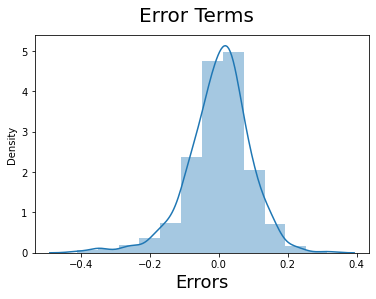

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

In [104]:
#Checking columns
X_train_rfe1.columns

Index(['const', 'yr', 'windspeed', 'summer', 'winter', 'Sept', 'Mist_Clouds',
       'Light_Snow_Rain', 'temp', 'workingday', 'Sat'],
      dtype='object')

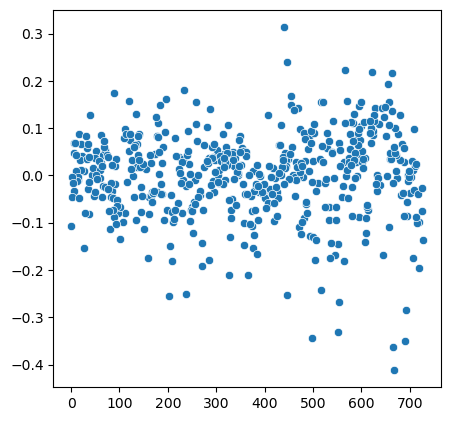

In [105]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(y = res, x = res.index)
plt.show()

- It can be observed that residuals are independant of each other.
- They have a constant variance (Homoscedacity)

In [106]:
print(X_train_rfe1.shape)
print(res.shape)

(510, 11)
(510,)


## Making Predictions

#### Applying the scaling on the test sets

In [107]:
print(num_vars)

['cnt', 'temp', 'hum', 'windspeed']


In [108]:
# Scaling the test data:
num_vars=['temp','hum','windspeed','cnt']
merdf_test[num_vars] = scaler.fit_transform(merdf_test[num_vars])

#### Dividing into X_test and y_test

In [109]:
y_test = merdf_test.pop('cnt')
X_test = merdf_test

In [110]:
X_train_new=X_train_rfe1.drop(['const'], axis=1)

In [111]:
X_train_new.columns

Index(['yr', 'windspeed', 'summer', 'winter', 'Sept', 'Mist_Clouds',
       'Light_Snow_Rain', 'temp', 'workingday', 'Sat'],
      dtype='object')

In [112]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [113]:
# Making predictions
y_pred = lm17.predict(X_test_new)

## Model Evaluation

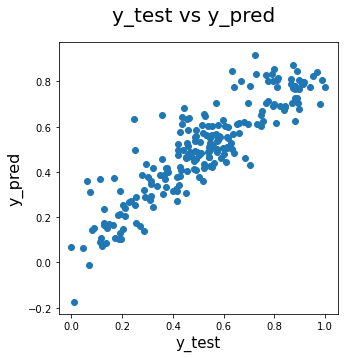

In [114]:
# Plotting y_test and y_pred to understand the spread. Predicted vs Test data:
fig = plt.figure(figsize=[5,5])
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=15)                          # X-label
plt.ylabel('y_pred', fontsize=16)    # Y-label

plt.show()

Text(0, 0.5, 'y_pred')

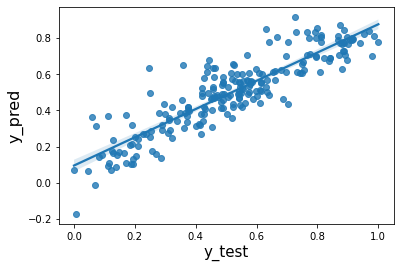

In [115]:
sns.regplot(y_test,y_pred)
plt.xlabel('y_test', fontsize=15)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [116]:
# R-squared score on the test set
r2_score(y_test, y_pred)

0.7875368822303463

In [117]:
from sklearn.metrics import mean_squared_error
#Returns the mean squared error; we'll take a square root
print(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))


0.11


In [118]:
# Creating a new variable to plot residuals vs independent variables:
X_Features=X_train_new.iloc[:,0].values

### Checking Autocorrelation:

In [119]:
# Building a function to check autocorrelation:
def autocorrelation_assumption(model, features, label):
    
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = res

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(res)
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')


In [120]:
autocorrelation_assumption(lm17,X_test_new,y_test)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0885340299289723
Little to no autocorrelation 

Assumption satisfied


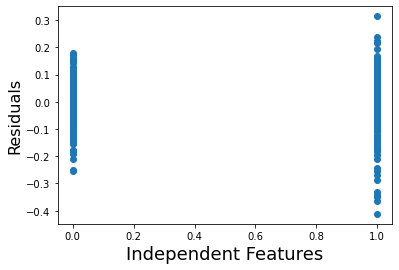

In [121]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_Features,res)
fig.suptitle('Independent Features vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('Independent Features', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [122]:
#Displaying features used in prediction for final model:
X_train_new.columns

Index(['yr', 'windspeed', 'summer', 'winter', 'Sept', 'Mist_Clouds',
       'Light_Snow_Rain', 'temp', 'workingday', 'Sat'],
      dtype='object')

In [123]:
print(round(lm17.params,2))

const              0.08
yr                 0.23
windspeed         -0.16
summer             0.09
winter             0.13
Sept               0.10
Mist_Clouds       -0.08
Light_Snow_Rain   -0.29
temp               0.55
workingday         0.06
Sat                0.07
dtype: float64



We can see that the equation of our best fitted line is:

$ cnt = 0.55  \times  temp + 0.23  \times  yr + 0.13 \times winter + 0.1 \times Sept + 0.09 \times summer + 0.07 \times Sat+ 0.06 \times workingday - 0.29 \times Light_Snow_Rain - 0.16 \times windspeed - 0.08 \times Mist_Clouds $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Build a non-linear model

### We can see the demand for bikes depends mainly on below variables:

- temp , yr ,winter, sept, summer, Sat ,Workingday ,Light_snow_Rain weather,windspeed , Mist_Clouds

##### Demands increase each year and in sept and when tempratures are in good range:
##### Demand decrease if the weather is bad (LightSNOW_Rain, if the windspeed is high:

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september


This indicates that the bike rentals is majorly affected by temperature,season and month.